In [1]:
import numpy as np
import seaborn as sns
from scipy import stats

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
# generate population
dat = stats.skewnorm.rvs(a=10, size=10000) # a is the skew

In [29]:
# population var
np.var(dat)

0.36296564127443864

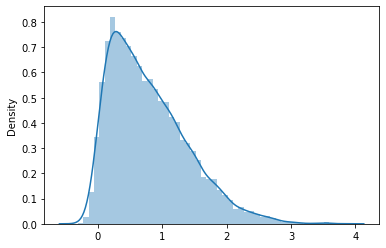

In [30]:
sns.distplot(dat);

In [31]:
#draw random samples of size n, compute stdev using n, n-1, n-2 append to list
varn = []
varnm1 = []
varnm2 = []
varnm3 = []

n = 100
for i in np.arange(10000):
    smpl = np.random.choice(dat,size=n, replace=False) # draw sample
    mn = np.mean(smpl) # sample mean
    devn = np.sum((smpl - mn)**2) # numerator of stev
    # using n
    varn.append(devn/n)
    # using n-1
    varnm1.append(devn/(n-1))
    # using n-2
    varnm2.append(devn/(n-2))
    # using n-3
    varnm3.append(devn/(n-3))

df = pd.DataFrame({'Var_n':varn, 'Var_nm1':varnm1, 'Var_nm2':varnm2, 'Var_nm3':varnm3 })

In [32]:
df.head()

,Var_n,Var_nm1,Var_nm2,Var_nm3
0,0.449375,0.453914,0.458546,0.463274
1,0.424858,0.429149,0.433528,0.437998
2,0.338725,0.342147,0.345638,0.349201
3,0.328647,0.331967,0.335354,0.338812
4,0.317878,0.321089,0.324365,0.327709


In [33]:
df.shape

(10000, 4)

In [34]:
# the stdev estimation using div by n underestimates population stdev consistently

In [35]:
# this is the true sigma
np.var(dat)

0.36296564127443864

In [36]:
abs(np.var(dat) - df.mean() )

Var_n      0.003768
Var_nm1    0.000139
Var_nm2    0.003563
Var_nm3    0.007341
dtype: float64